In [23]:
import numpy as np
import pandas as pd
from sklearn import linear_model

import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houses = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


houses.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


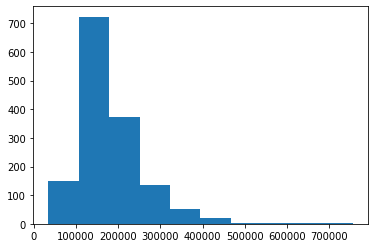

In [24]:
plt.hist(houses.saleprice)
plt.show()

In [25]:
houses.isnull().sum().sort_values(ascending=False)

poolqc           1453
miscfeature      1406
alley            1369
fence            1179
fireplacequ       690
lotfrontage       259
garagecond         81
garagetype         81
garageyrblt        81
garagefinish       81
garagequal         81
bsmtexposure       38
bsmtfintype2       38
bsmtfintype1       37
bsmtcond           37
bsmtqual           37
masvnrarea          8
masvnrtype          8
electrical          1
utilities           0
yearremodadd        0
mssubclass          0
foundation          0
extercond           0
exterqual           0
exterior2nd         0
exterior1st         0
roofmatl            0
roofstyle           0
yearbuilt           0
                 ... 
garagearea          0
paveddrive          0
wooddecksf          0
openporchsf         0
threessnporch       0
bsmtunfsf           0
screenporch         0
poolarea            0
miscval             0
mosold              0
yrsold              0
saletype            0
functional          0
totrmsabvgrd        0
kitchenqua

In [26]:
# get a list of columns
cols = list(houses)

# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('saleprice')))
cols.remove('id')
# use ix to reorder
houses = houses.ix[:, cols]
houses.head()

,saleprice,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
0,208500,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,181500,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,223500,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,140000,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,250000,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal


In [27]:
houses.corr().sort_values(by='saleprice',ascending=False)

,saleprice,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold
saleprice,1.000000,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923
overallqual,0.790982,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
grlivarea,0.708624,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526
garagecars,0.640409,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.882475,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117
garagearea,0.623431,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,1.000000,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378
totalbsmtsf,0.613581,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969
firstflrsf,0.605852,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604
fullbath,0.560664,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.405656,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669
totrmsabvgrd,0.533723,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,...,0.337822,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516
yearbuilt,0.522897,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618


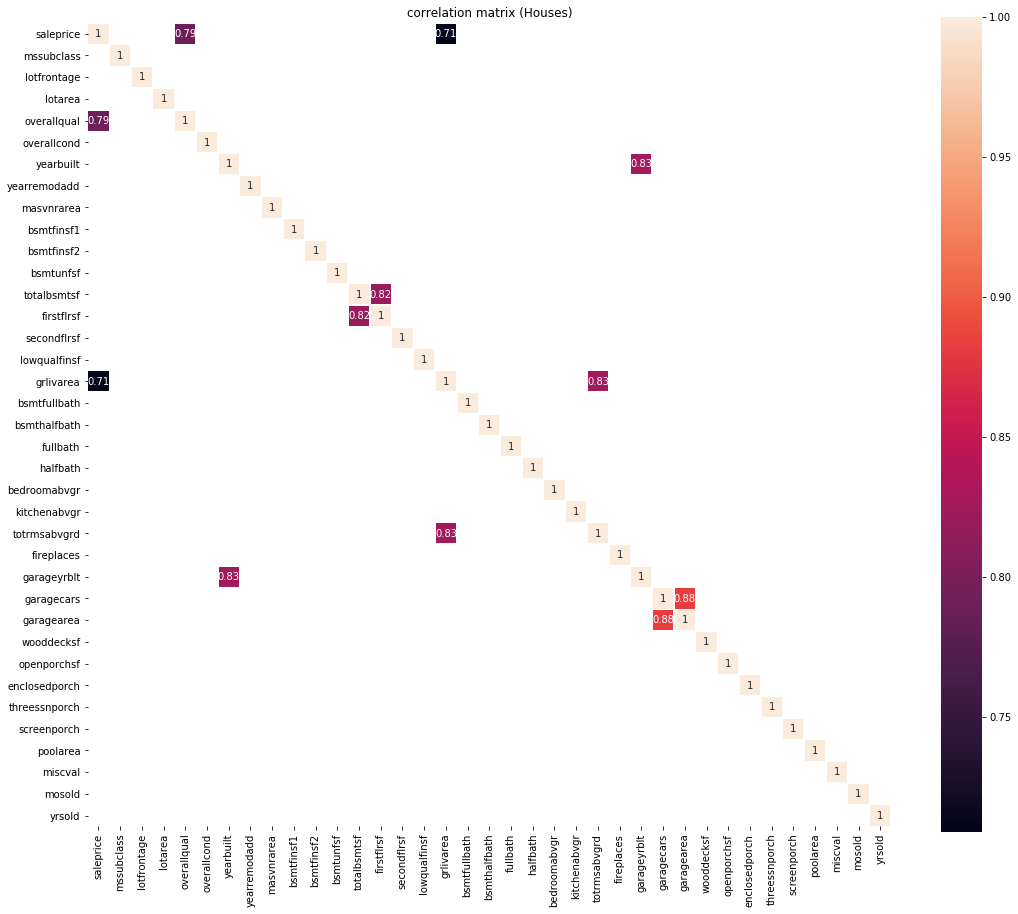

In [28]:
# make the correlation matrix.
corr_mat_houses = houses.corr()
corr_mat_houses = corr_mat_houses[corr_mat_houses > .7]


plt.figure(figsize=(18,15))

plt.plot(1,1)
# draw the heatmap using seaborn.
sns.heatmap(corr_mat_houses, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Houses)")

plt.show()



In [29]:
houses = houses[['saleprice','overallqual','grlivarea','garagecars','garagearea','totalbsmtsf','firstflrsf','fullbath','totrmsabvgrd','yearbuilt']]

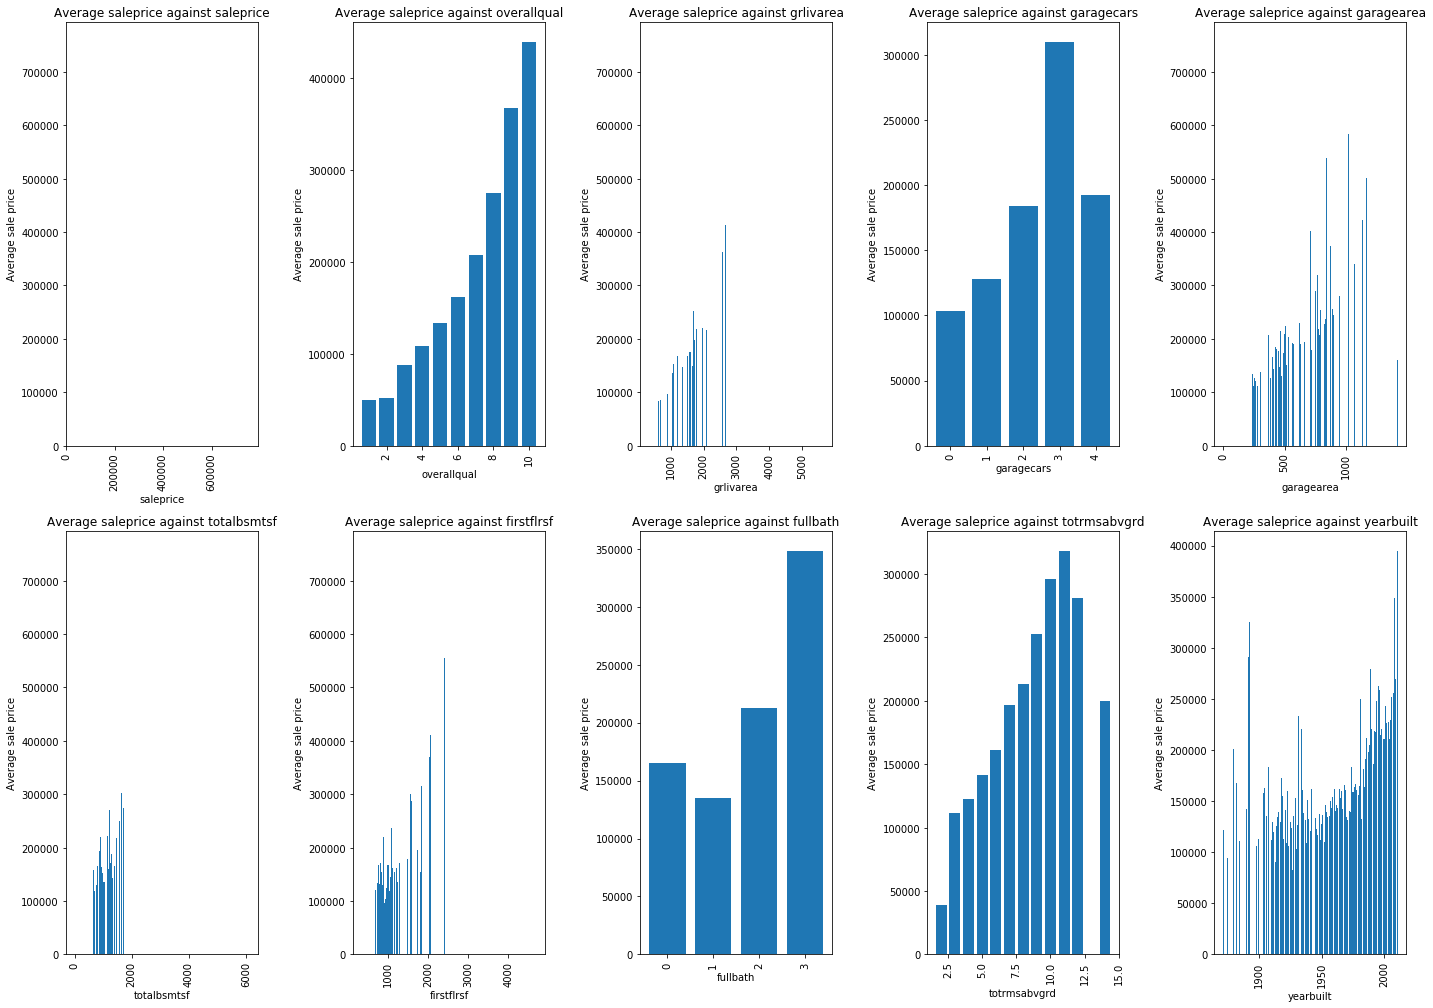

In [30]:
plt.figure(figsize=(20,70))

for index, column in enumerate(houses.columns):
    plt.subplot(10,5,index+1)
    plt.bar(houses.groupby(column)["saleprice"].mean().index, houses.groupby(column)["saleprice"].mean())
    plt.title("Average saleprice against {}".format(column))
    plt.ylabel("Average sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

In [31]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
saleprice       1460 non-null int64
overallqual     1460 non-null int64
grlivarea       1460 non-null int64
garagecars      1460 non-null int64
garagearea      1460 non-null int64
totalbsmtsf     1460 non-null int64
firstflrsf      1460 non-null int64
fullbath        1460 non-null int64
totrmsabvgrd    1460 non-null int64
yearbuilt       1460 non-null int64
dtypes: int64(10)
memory usage: 114.1 KB


In [33]:
features = list(houses.columns)
features.remove('saleprice')

X = houses[features]
Y = houses['saleprice']


X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     540.3
Date:                Thu, 02 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:57:25   Log-Likelihood:                -17470.
No. Observations:                1460   AIC:                         3.496e+04
Df Residuals:                    1450   BIC:                         3.501e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.585e+05   9.15e+04     -8.294      0.000   -9.38e+05   -5.79e+05
overallqual   2.092e+04   1164.267     17.971      0.000    1.86e+04    2.32e+04
grlivarea       51.3679      4.263     12.051      0.000      43.006      59.730
garagecars    1.063e+04   3065.576      3.469      0.001    4620.797    1.66e+04
garagearea      14.5088     10.384      1.397      0.163      -5.861      34.879
totalbsmtsf     19.2466      4.324      4.451      0.000      10.765      27.728
firstflrsf      13.9481      4.965      2.810      0.005       4.210      23.687
fullbath     -5410.3114   2684.921     -2.015      0.044   -1.07e+04    -143.567
totrmsabvgrd   -86.6391   1126.726     -0.077      0.939   -2296.827    2123.549
yearbuilt      345.3629     47.886      7.212      0.000     251.430     439.295
==============================================================================
Omnibus:                      470.067   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52956.991
Skew:                          -0.413   Prob(JB):                         0.00
Kurtosis:                      32.493   Cond. No.                     2.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# Y is the target variable
Y = houses['saleprice']
# X is the feature set which includes the 10 feature
X = houses[['overallqual','grlivarea','garagecars','garagearea','totalbsmtsf','firstflrsf','fullbath','totrmsabvgrd','yearbuilt']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 2.09227655e+04  5.13679300e+01  1.06342357e+04  1.45088448e+01
  1.92465885e+01  1.39481175e+01 -5.41031135e+03 -8.66391119e+01
  3.45362905e+02]

Intercept: 
 -758532.9134995419
